In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

from torchvision import models
from visualization.modules import LayeredModule
from visualization.image_proc import *

In [2]:
def get_vanilla_backprop(example_index):
    original_img, name, target_class = get_example_data(example_index, img_path='../old_visual/input_images/')
    pretrained_model = models.alexnet(pretrained=True)
    # Vanilla backprop
    model = LayeredModule.from_alexnet(pretrained_model)
    # Generate gradients
    prep_img = preprocess_image(original_img)
    gradients = model.get_gradients_for_sample(prep_img, target_class)
    # we need to get the first layer, squeeze it an make it numpy
    vanilla_grads = gradients['features-conv-0'][0].numpy()[0]
    vanilla_grads_color = normalize_to_range(vanilla_grads)
    vanilla_grads_gray = convert_to_grayscale(vanilla_grads)
    
    show_images([original_img, vanilla_grads_color, vanilla_grads_gray], [name, 'Backprop Color', 'Backprop Grayscale'])

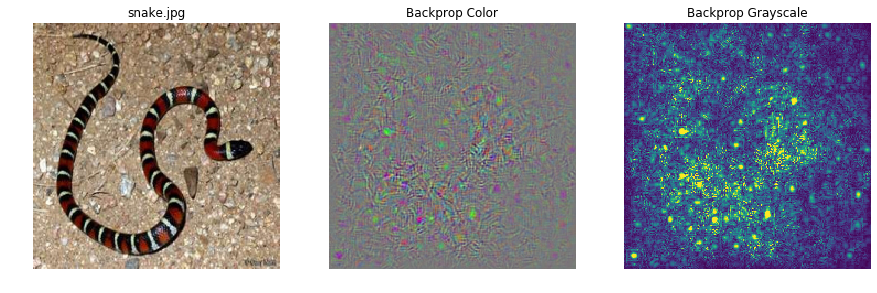

In [3]:
get_vanilla_backprop(0)

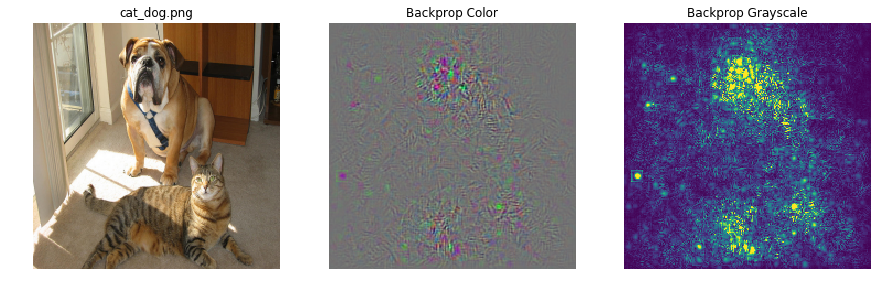

In [4]:
get_vanilla_backprop(1)

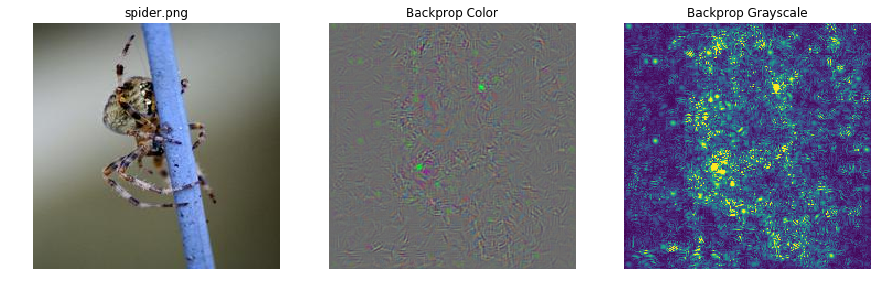

In [5]:
get_vanilla_backprop(2)